Read raw data with zone(from kmeans clustering result)
===

In [1]:
import time
import os
import numpy as np
import seaborn as sns
import matplotlib
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from matplotlib import pyplot as plt
from matplotlib.patches import Circle
from PIL import Image
from keras.utils import np_utils#
from numpy import genfromtxt
#from learning_model import *
from sklearn.metrics import mean_squared_error
from keras.models import Sequential, load_model
from keras.layers import Dense, Activation
from keras.optimizers import Adam
from sklearn.tree import DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
%matplotlib inline

Using TensorFlow backend.
/usr/local/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [185]:
train_part_test = np.genfromtxt('./zone_result/set10_noleft_cluster.csv', delimiter=',')
train_part_test_pci = np.genfromtxt('./interface/set10_pci.csv', delimiter=',')

pixel_pos = np.genfromtxt('./src/pixel_pos.csv', delimiter=',')
print (train_part_test)
#print (pixel_pos[1:,:])

[[ 49.297     23.5735    38.       -93.618462   7.      ]
 [ 49.5745    20.4835    38.       -72.290244   2.      ]
 [ 49.7575    18.3445    38.       -61.895402  12.      ]
 ...
 [102.013     16.903     42.       -70.675      8.      ]
 [102.0925    15.3595    42.       -70.883333   8.      ]
 [102.1705    18.4405    42.       -62.773188   8.      ]]


PCI training
===

[39. 39. 39. 41. 39. 38. 41. 41. 39. 40. 39. 39. 41. 38. 41. 41. 39. 41.]
18
n_accuracy_pci== 17
len(pci_pred)== 18
pci accuracy:  0.9444444444444444


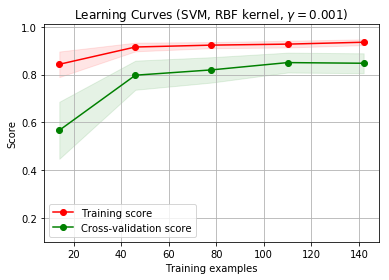

In [191]:
X = train_part_test_pci[:,0:2]
y = train_part_test_pci[:,2]
#y = np_utils.to_categorical(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
#print(X_train)
modelClassifier = KNeighborsClassifier(n_neighbors=3)
#modelClassifier = DecisionTreeClassifier()
#modelClassifier = MLPClassifier(solver='adam', alpha=1e-5,
#                                hidden_layer_sizes=(100, 1), random_state=1)
#
'''
modelClassifier = Sequential()
modelClassifier.add(Dense(128, activation='relu', input_dim = 2))
modelClassifier.add(Dense(128, activation='relu'))
modelClassifier.add(Dense(128, activation='relu'))
modelClassifier.add(Dense(128, activation='relu'))
modelClassifier.add(Dense(1,activation='relu'))
modelClassifier.compile(loss='mean_squared_error', optimizer='adam')
modelClassifier.fit(X_train, y_train, nb_epoch=nb_epoch, batch_size=16, shuffle=True)
'''
modelClassifier.fit(X_train, y_train)
y_pred = modelClassifier.predict(X_test)
print(y_pred)
print(len(y_pred))
#print(y_test)
#print(len(y_test))
n_accuracy = 0
for i in range(len(y_pred)):
    if y_pred[i] == y_test[i]: 
        n_accuracy = n_accuracy+1
print ("n_accuracy_pci==",n_accuracy)
print ("len(pci_pred)==",len(y_pred))
acc = n_accuracy/(len(y_pred))
print('pci accuracy: ',acc )
plot_learning_curve(modelClassifier, title, X, y, ylim=(0.1, 1.01),cv=cv, n_jobs=4)
plt.show()

Predict pci and plot pci map
===

In [82]:
def convert_location_data(x, y) :
    '''
    lng = a * x1 - b * y2 + c 
    lat = a * x2 + b * y1 + d

    NEMO -> indoor position value
    (840, -351) -> (96.824, 0)
    (923, -179) -> (107.068, 15.874)
    '''
    a = 0.1185
    b = -0.003
    c = -1.81
    d = 39.842
    
    lng = a * x - b * y * (-1) + c - 4
    lat = a * y * (-1) + b * x + d - 0.5
    
    
    return lng, lat

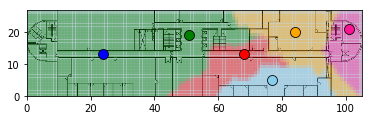

In [192]:
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
output = modelClassifier.predict(pixel_pos[1:,:])
#print(output)
#np.savetxt('output.csv', output, delimiter=',', fmt='%f')
pci = []
pci_input =  [37, 38, 39, 40, 41, 42, 120, 151, 154, 1, 62]
pci_config = np.array(pci_input)
f = open('./result_pci/pci_result.csv', 'w') #write the pci result into file
f.write('x,y,pci,\n')
#z = np.reshape(output, (y_resolution, x_resolution))
#z[:] = map(list,zip(*z[::-1]))
#z = np.genfromtxt('z.csv', delimiter=',')
#z_pred = np.hstack((xy, pci_map_pred))
#pci_pred = output.reshape(27,105)
z = np.reshape(output, (y_resolution, x_resolution))
#np.savetxt('z.csv', z, delimiter=',', fmt='%f')
for j in range(y_resolution):
        for i in range(x_resolution) : 
            pci = z[j][i]
            if pci == 37 :#37
                #pci_real = pci_config[0] 
                plt.plot(round(i), round(j), color='blue', marker = 's', markersize=5, alpha=.1)
            elif pci == 38 :#38
                #pci_real = pci_config[1]
                plt.plot(round(i), round(j), color='green', marker = 's', markersize=5, alpha=.1 )
            elif pci == 39 :#39
                #pci_real = pci_config[2]
                plt.plot(round(i), round(j), color='red', marker = 's', markersize=5, alpha=.1 )
            elif pci == 40:#40
                #pci_real = pci_config[3]
                plt.plot(round(i), round(j), color='skyblue', marker = 's', markersize=5, alpha=.1)
            elif pci == 41:#41
                #pci_real = pci_config[4]
                plt.plot(round(i), round(j), color='orange', marker = 's', markersize=5, alpha=.1)
            elif pci == 42:#42
                #pci_real = pci_config[5]
                plt.plot(round(i), round(j), color='deeppink', marker = 's', markersize=5, alpha=.1)
            elif pci == 120:#120
                #pci_real = pci_config[6]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 151:#151
                #pci_real = pci_config[7]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            elif pci == 154:#154
                #pci_real = pci_config[8]
                plt.plot(round(i), round(j), color='yellow', marker = 's', markersize=5, alpha=.1)
            else :                 
                pci_real = -1
                plt.plot(round(i), round(j), color='white', marker = 's', markersize=5, alpha=.1 )
            result = str(i) + ',' + str(j) + ',' + str(pci) +',' + '\n'
            f.write(result)  # python will convert \n to os.linesep

f.close()  # you can omit in most cases as the destructor will call it
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
x, y = convert_location_data (260,215) #37
plt.plot(round(abs(x)), round(abs(y)), color='blue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

#SC1 (199, 151)
#x, y = convert_location_data (199, 868)
x, y = convert_location_data (480, 158) #38
plt.plot(round(abs(x)), round(abs(y)), color='green', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (630, 210) #39
plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='purple', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (710, 275) #40
plt.plot(round(abs(x)), round(abs(y)), color='skyblue', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
    
x, y = convert_location_data (765, 145) #41
plt.plot(round(abs(x)), round(abs(y)), color='orange', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
#plt.plot(round(abs(x)), round(abs(y)), color='red', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)

x, y = convert_location_data (908, 130) #42
plt.plot(round(abs(x)), round(abs(y)), color='deeppink', marker = 'o', markersize=10, markeredgecolor = 'black', markeredgewidth = 0.8)
plt.savefig('test', dpi=200)

Generate all points with pci and zone
===

In [193]:
pci_result_zone = np.genfromtxt('./result_pci/pci_result.csv', delimiter=',')
#print (pci_result_zone)
for i in range(len(pci_result_zone)):
    pci_result_zone[:,3] = "0" 
#print (pci_result_zone)
pci_result_zone_pd = pd.DataFrame(pci_result_zone,columns=['x','y','pci','zone'])
pci_result_zone_pd = pci_result_zone_pd.drop(pci_result_zone_pd.index[0])
pci_result_zone_pd.to_csv('./result_pci/pci_result_zone_pd.csv')
pci_result_zone_pd_nopci = np.delete(pci_result_zone_pd.values,[2],axis=1)
#print (pci_result_zone_pd)
#print (pci_result_zone_pd_nopci)
print (len(pci_result_zone_pd_nopci))
print (pci_result_zone_pd_nopci)
train_part_test[:,0] = np.around(train_part_test[:,0])
train_part_test[:,1] = np.around(train_part_test[:,1])
#print (train_part_test)
train_part_test_pd = pd.DataFrame(train_part_test,columns=['x','y','pci','rsrp','zone'])
#print (train_part_test_pd)

2835
[[  0.   0.   0.]
 [  1.   0.   0.]
 [  2.   0.   0.]
 ...
 [102.  26.   0.]
 [103.  26.   0.]
 [104.  26.   0.]]


Merge raw data zone and use KNN to predict points zone without real data
===

In [194]:
#print(train_part_test)
#print(result)
#df_dul = np.delete(train_part_test,[2,3],axis=1)
df_dul_pd = pd.DataFrame(train_part_test,columns=['x','y','pci','rsrp','zone'])
df_dul_pd_train = pd.DataFrame(df_dul_pd,columns=['x','y','zone','pci','rsrp'])
print(len(df_dul_pd))
#print(df_dul_pd_train)
#df_dul_np = df_dul.values
df_dul_np = df_dul_pd_train.values
print(df_dul_np)
np.savetxt('./result_pci/df_dul_np_result.csv', df_dul_np, delimiter=',', fmt='%f')
X = df_dul_np[:len(df_dul_pd),0:2]
y = df_dul_np[:len(df_dul_pd),2]
#print(X)
#print(y)
modelClassifier = KNeighborsClassifier(n_neighbors=3)
#modelClassifier = DecisionTreeClassifier()
#modelClassifier = MLPClassifier()
#modelClassifier = SVC(kernel='poly', probability=True)
#print(df_dul_np)
#pci_pred = modelClassifier.fit(X, y).predict(df_dul_np[result:,0:2])
pci_pred = modelClassifier.fit(X, y).predict(pci_result_zone_pd_nopci[:,0:2])
print(len(pci_result_zone_pd_nopci))

#print(pci_pred)
print(len(pci_pred))
print("===")
#print(type(pci_pred))
#print("len(pci_pred)==",len(pci_pred))
print(df_dul_np)
for i in range(len(pci_pred)):
    #df_dul_np[result+i:,2] = pci_pred[i]
    pci_result_zone_pd_nopci[i,2] = pci_pred[i]
print (len(pci_pred))
print (len(pci_result_zone_pd_nopci))
print (pci_result_zone_pd_nopci)
df_dul_np = pci_result_zone_pd_nopci
np.savetxt('./result_pci/zone_knn_result.csv', pci_pred, delimiter=',', fmt='%f')
#print (df_dul_np)
#np pci test
#df_dul_sort_pd = pd.DataFrame(df_dul_np,columns=['x','y','pci','zone'])
df_dul_sort_pd = pd.DataFrame(df_dul_np,columns=['x','y','zone'])
print(type(df_dul_sort_pd))
#print (df_dul_sort_pd)
df_dul_sort = df_dul_sort_pd.sort_values(by=['y','x'])
print(type(df_dul_sort))
#print (df_dul_sort.tail())
df_dul_sort.to_csv('./result_pci/zone_knn_result_sort_pd.csv')

#print (df_dul_sort)

211
[[ 49.        24.         7.        38.       -93.618462]
 [ 50.        20.         2.        38.       -72.290244]
 [ 50.        18.        12.        38.       -61.895402]
 ...
 [102.        17.         8.        42.       -70.675   ]
 [102.        15.         8.        42.       -70.883333]
 [102.        18.         8.        42.       -62.773188]]
2835
2835
===
[[ 49.        24.         7.        38.       -93.618462]
 [ 50.        20.         2.        38.       -72.290244]
 [ 50.        18.        12.        38.       -61.895402]
 ...
 [102.        17.         8.        42.       -70.675   ]
 [102.        15.         8.        42.       -70.883333]
 [102.        18.         8.        42.       -62.773188]]
2835
2835
[[  0.   0.  12.]
 [  1.   0.  12.]
 [  2.   0.  12.]
 ...
 [102.  26.   8.]
 [103.  26.   8.]
 [104.  26.   8.]]
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [195]:
#print(train_part_test)
train_part_test_pd = pd.DataFrame(train_part_test,columns=['x','y','pci','rsrp','zone'])
df = train_part_test_pd.append(pci_result_zone_pd)
print("len(df)==",len(df))
#print(df)
#df = train_part_test_pd.loc[train_part_test_pd['x'].isin(pci_result_zone_pd['x']) & train_part_test_pd['y'].isin(pci_result_zone_pd['y'])]
#df1 = pci_result_zone_pd.loc[pci_result_zone_pd['x'].isin(train_part_test_pd['x']) & pci_result_zone_pd['y'].isin(train_part_test_pd['y'])]
#df = train_part_test_pd.loc[(train_part_test_pd['x'] != pci_result_zone_pd['x']) & (train_part_test_pd['y'] != pci_result_zone_pd['y'])]
#print("df==",df)
df = df[['x', 'y', 'pci', 'zone','rsrp']]
#print("df==",df)
np.savetxt('./result_rsrp/zone_beforemerge.csv', df, delimiter=',', fmt='%f')
df_no_rsrp = df.drop(['rsrp'],axis=1)
#no pci test
df_no_rsrp_nopci = df.drop(['pci'],axis=1)
#print(df_no_rsrp)
print(len(df_no_rsrp))
df_dul = df_no_rsrp_nopci.drop_duplicates(subset=['x', 'y'], keep='first', inplace=False)
#print(len(df_dul))
#print(df_dul)
#df_dul = df_dul[['x','y','pci','zone']]
df_dul = df_dul[['x','y','zone']]
np.savetxt('./result_rsrp/zone_aftermerge.csv', df_dul, delimiter=',', fmt='%f')
#df_dul_number = pd.DataFrame(df_dul,columns=['x','y','pci','zone'])
df_dul_number = pd.DataFrame(df_dul,columns=['x','y','zone'])
#print(df_dul_number)
number = 0
#print(df_dul_number)
for a in range(len(df_dul_number)):
    if(df_dul_number.iloc[a,2] == 0):
        number = number+1
print(number)
result = (len(df_dul_number))-number
print(result)
#df = df.drop(['Unnamed: 0'],axis=1)
#df.to_csv('zone_compare1_nosort.csv')
#print(len(df))
#df_sort = df_dul.sort_values(by=['y','x'])
#df_sort.to_csv('./result_pci/zone_handle.csv')
#print("len(df_sort)==",len(df_sort))


/usr/local/lib/python3.5/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


len(df)== 3046
3046
2657
178


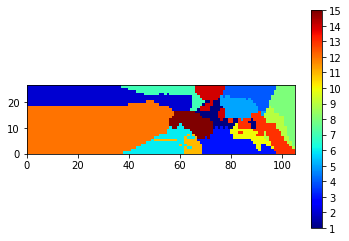

In [196]:
map_size = [105, 27]
x_resolution = map_size[0]
y_resolution = map_size[1]
#no pci test
#data_plot = (df_dul_sort.values[:,3]).reshape(27, 105)
data_plot = (df_dul_sort.values[:,2]).reshape(27, 105)
#print(df_dul_sort)
img = plt.imread("./pic/51_5F-3.png")
#print(data_plot)

plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
heatmap_rsrp = plt.pcolor(data_plot,cmap='jet',alpha=1)
plt.colorbar(ticks=range(16))

Draw learning curve
===

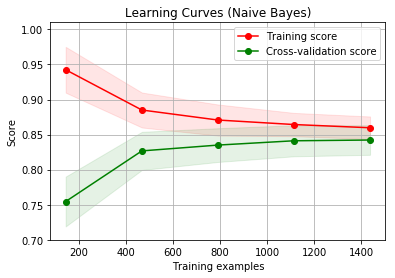

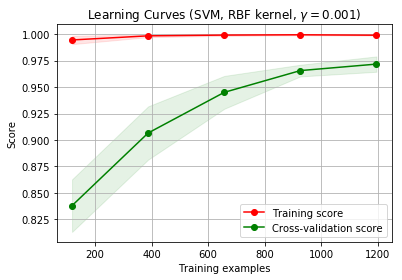

In [3]:
#def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
#                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
def plot_learning_curve(estimator, title, X, y, ylim=None,n_jobs=None, cv=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()
X, y = digits.data, digits.target
#print("X==",X[0:2])
#print("y==",y[:])
title = "Learning Curves (Naive Bayes)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = GaussianNB()
plot_learning_curve(estimator, title, X, y, (0.7, 1.01), cv=cv, n_jobs=4)

title = "Learning Curves (SVM, RBF kernel, $\gamma=0.001$)"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
estimator = SVC(gamma=0.001)
plot_learning_curve(estimator, title, X, y)

plt.show()


Get raw data rsrp and do rsrp training
===

In [57]:
#::train_part_test is raw data
print(train_part_test)
#::df_dul_sort is knn result for every point
print(df_dul_sort.values)

[[  49.         24.         38.        -85.338039    4.      ]
 [  50.         15.         38.        -79.72        9.      ]
 [  50.         20.         38.        -79.552593   12.      ]
 [  50.         17.         38.        -75.01063    12.      ]
 [  50.         13.         38.        -80.438722    9.      ]
 [  50.         18.         38.        -65.92554    12.      ]
 [  52.         18.         38.        -69.382677   12.      ]
 [  52.         24.         38.        -87.356126    4.      ]
 [  52.         12.         38.        -80.14        9.      ]
 [  52.         15.         38.        -78.771429    9.      ]
 [  52.         21.         38.        -83.96378    12.      ]
 [  52.         17.         38.        -72.331452   12.      ]
 [  54.         12.         38.        -79.185827    9.      ]
 [  54.         20.         38.        -78.621912   12.      ]
 [  54.         18.         38.        -77.214607   12.      ]
 [  54.         17.         38.        -75.864173   12.

Delete mutiple training result list
===

In [201]:
rmse_list=[]
rmse_list_knn=[]
rmse_list_dt=[]
rmse_list_rf=[]
rmse_list_gb=[]
rmse_list_dnn=[]
choose_a = []
rmse_total = []

In [173]:
os.remove('./zone_result/zone_predict_total.csv')
print("zone_predict_total has been Removed!")

zone_predict_total has been Removed!


Start Rsrp training
===

In [199]:
#print(train_part_test)

In [200]:
#print(df_dul_sort.values)

In [202]:
start = time.time()
for a in range(100):
    for i in range(1,16):
        print(i)
        zone = np.array([])
        zone = np.where(train_part_test[:,4] == i)
        #zone = np.where(X_sparse_total[:,7] == i)
        #print(train_part_test[zone[0],:])
        print("zone == ",zone[0])
        X = train_part_test[zone[0],0:3]
        y = train_part_test[zone[0],3]      
        #print(X)
        #print(y)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
        #print(X_train)
        model_knn = KNeighborsRegressor(n_neighbors=3,weights='uniform')
        model_dt = DecisionTreeRegressor()
        model_rf = RandomForestRegressor()
        model_gb = GradientBoostingRegressor()
        model_dnn = MLPRegressor(solver='lbfgs', alpha=1e-5,
                                 hidden_layer_sizes=(100,), random_state=1) 
        #model = SVR(kernel='linear', C=1e3)
        #scores = cross_val_score(model, X, y, cv=5)
        #print("scores == ",scores)
        #print("scores.mean() == ",scores.mean())
        model_knn.fit(X_train, y_train)  
        model_dt.fit(X_train, y_train)
        model_rf.fit(X_train, y_train) 
        model_gb.fit(X_train, y_train) 
        model_dnn.fit(X_train, y_train) 
        #print(model)
        filename_knn = './model/finalized_model_' + str(i) +'-' +'knn'+'.sav'
        pickle.dump(model_knn, open(filename_knn, 'wb'))
        y_pred_knn = model_knn.predict(X_test)
        filename_dt = './model/finalized_model_' + str(i) +'-' +'dt'+'.sav'
        pickle.dump(model_dt, open(filename_dt, 'wb'))
        y_pred_dt = model_dt.predict(X_test)
        filename_rf = './model/finalized_model_' + str(i) +'-' +'rf'+'.sav'
        pickle.dump(model_rf, open(filename_rf, 'wb'))
        y_pred_rf = model_rf.predict(X_test)
        filename_gb = './model/finalized_model_' + str(i) +'-' +'gb'+'.sav'
        pickle.dump(model_gb, open(filename_gb, 'wb'))
        y_pred_gb = model_gb.predict(X_test)
        filename_dnn = './model/finalized_model_' + str(i) +'-' +'dnn'+'.sav'
        pickle.dump(model_dnn, open(filename_dnn, 'wb'))
        y_pred_dnn = model_dnn.predict(X_test)
        #print(df_dul_sort.values[zone_allpoint[0],0:3])
        #np pci test
        #zone_allpoint = np.where(df_dul_sort.values[:,3] == i)
        #print(df_dul_sort)
        zone_allpoint = np.where(df_dul_sort.values[:,2] == i)
        #print (len(df_dul_sort.values))
        #print (df_dul_sort.values)
        #print (zone_allpoint)
        #print(df_dul_sort.values[zone_allpoint[0],0:3])
        #predict_zone = model.predict(df_dul_sort.values[zone_allpoint[0],0:3])
        #print(pci_result_zone)
        predict_zone_knn = model_knn.predict(pci_result_zone[zone_allpoint[0]+1,0:3])
        predict_zone_dt = model_dt.predict(pci_result_zone[zone_allpoint[0]+1,0:3])
        predict_zone_rf = model_rf.predict(pci_result_zone[zone_allpoint[0]+1,0:3])
        predict_zone_gb = model_gb.predict(pci_result_zone[zone_allpoint[0]+1,0:3])
        predict_zone_dnn = model_dnn.predict(pci_result_zone[zone_allpoint[0]+1,0:3])
        #print(len(predict_zone))
        #print("weight == ",len(predict_zone)/len(pci_result_rsrp_train))
        name_knn = './zone_result/zone_predict_' + str(i) +'knn'+'.csv'
        name_dt = './zone_result/zone_predict_' + str(i) +'dt'+'.csv'
        name_rf = './zone_result/zone_predict_' + str(i) +'rf'+'.csv'
        name_gb = './zone_result/zone_predict_' + str(i) +'gb'+'.csv'
        name_dnn = './zone_result/zone_predict_' + str(i) +'dnn'+'.csv'
        #df_loc = pd.DataFrame(df_dul_sort.values[zone_allpoint[0],0:3],columns=['x','y','pci'])
        df_loc = pd.DataFrame(pci_result_zone[zone_allpoint[0]+1,0:3],columns=['x','y','pci'])
        df_rsrp_knn = pd.DataFrame(predict_zone_knn,columns=['rsrp'])
        df_rsrp_dt = pd.DataFrame(predict_zone_dt,columns=['rsrp'])
        df_rsrp_rf = pd.DataFrame(predict_zone_rf,columns=['rsrp'])
        df_rsrp_gb = pd.DataFrame(predict_zone_gb,columns=['rsrp'])
        df_rsrp_dnn = pd.DataFrame(predict_zone_dnn,columns=['rsrp'])
        
        df_result_knn = pd.concat([df_loc,df_rsrp_knn],axis=1)
        df_result_dt = pd.concat([df_loc,df_rsrp_dt],axis=1)
        df_result_rf = pd.concat([df_loc,df_rsrp_rf],axis=1)
        df_result_gb = pd.concat([df_loc,df_rsrp_gb],axis=1)
        df_result_dnn = pd.concat([df_loc,df_rsrp_dnn],axis=1)

        df_result_knn.to_csv(name_knn,index=False,columns=['x','y','pci','rsrp'])
        df_result_dt.to_csv(name_dt,index=False,columns=['x','y','pci','rsrp'])
        df_result_rf.to_csv(name_rf,index=False,columns=['x','y','pci','rsrp'])
        df_result_gb.to_csv(name_gb,index=False,columns=['x','y','pci','rsrp'])
        df_result_dnn.to_csv(name_dnn,index=False,columns=['x','y','pci','rsrp'])
    #df_result = []
    
    #np.savetxt(name, predict_zone_every, delimiter=',', fmt='%f')
    #print("X_test",X_test)
    #print("y_pred",y_pred)
    #print("predict_zone",predict_zone)
    #print("[MSE]==",mean_squared_error(y_test, y_pred))
    #print("[RMSE]==",mean_squared_error(y_test, y_pred)**(0.5))
    #print("RMSE with weight result == ",(len(predict_zone)/len(df_dul_sort.values))*mean_squared_error(y_test, y_pred)**(0.5))
        print(mean_squared_error(y_test, y_pred_knn)**(0.5))
        print(len(predict_zone_knn))
        print(len(df_dul_sort.values))
        rmse_list_knn.extend((i,mean_squared_error(y_test, y_pred_knn)**(0.5),(len(predict_zone_knn)/len(df_dul_sort.values))*mean_squared_error(y_test, y_pred_knn)**(0.5)))
        rmse_list_dt.extend((i,mean_squared_error(y_test, y_pred_dt)**(0.5),(len(predict_zone_dt)/len(df_dul_sort.values))*mean_squared_error(y_test, y_pred_dt)**(0.5)))
        rmse_list_rf.extend((i,mean_squared_error(y_test, y_pred_rf)**(0.5),(len(predict_zone_rf)/len(df_dul_sort.values))*mean_squared_error(y_test, y_pred_rf)**(0.5)))
        rmse_list_gb.extend((i,mean_squared_error(y_test, y_pred_gb)**(0.5),(len(predict_zone_gb)/len(df_dul_sort.values))*mean_squared_error(y_test, y_pred_gb)**(0.5)))
        rmse_list_dnn.extend((i,mean_squared_error(y_test, y_pred_dnn)**(0.5),(len(predict_zone_dnn)/len(df_dul_sort.values))*mean_squared_error(y_test, y_pred_dnn)**(0.5)))
        #print("rmse_list == ",rmse_list)
        rmse_np_knn = np.array(rmse_list_knn)
        rmse_np_dt = np.array(rmse_list_dt)
        rmse_np_rf = np.array(rmse_list_rf)
        rmse_np_gb = np.array(rmse_list_gb)
        rmse_np_dnn = np.array(rmse_list_dnn)

        rmse_reshape_knn = np.reshape(rmse_np_knn,(int(len(rmse_np_knn)/3),3))
        rmse_reshape_dt = np.reshape(rmse_np_dt,(int(len(rmse_np_dt)/3),3))
        rmse_reshape_rf = np.reshape(rmse_np_rf,(int(len(rmse_np_rf)/3),3))
        rmse_reshape_gb = np.reshape(rmse_np_gb,(int(len(rmse_np_gb)/3),3))
        rmse_reshape_dnn = np.reshape(rmse_np_dnn,(int(len(rmse_np_dnn)/3),3))
        #print("rmse_np == ",rmse_np)
        #print("rmse_reshape == ",rmse_reshape_knn)
        #loaded_model_knn = pickle.load(open(filename_knn, 'rb')) 
        #loaded_model_dt = pickle.load(open(filename_dt, 'rb')) 
        #loaded_model_rf = pickle.load(open(filename_rf, 'rb')) 
        #loaded_model_gb = pickle.load(open(filename_gb, 'rb')) 
        #loaded_model_dnn = pickle.load(open(filename_dnn, 'rb')) 
rmse_reshape_knn = np.around(rmse_reshape_knn, decimals=2)
rmse_reshape_dt = np.around(rmse_reshape_dt, decimals=2)
rmse_reshape_rf = np.around(rmse_reshape_rf, decimals=2)
rmse_reshape_gb = np.around(rmse_reshape_gb, decimals=2)
rmse_reshape_dnn = np.around(rmse_reshape_dnn, decimals=2)
np.savetxt("./zone_result/rmse_reshape_knn.csv",rmse_reshape_knn, delimiter=',', fmt='%f')
np.savetxt("./zone_result/rmse_reshape_dt.csv",rmse_reshape_dt, delimiter=',', fmt='%f')
np.savetxt("./zone_result/rmse_reshape_rf.csv",rmse_reshape_rf, delimiter=',', fmt='%f')
np.savetxt("./zone_result/rmse_reshape_gb.csv",rmse_reshape_gb, delimiter=',', fmt='%f')
np.savetxt("./zone_result/rmse_reshape_dnn.csv",rmse_reshape_dnn, delimiter=',', fmt='%f')

rmse_reshape_pd_knn = pd.DataFrame(rmse_reshape_knn,columns=['zone','rmse_knn','weight_knn'])
rmse_reshape_pd_dt = pd.DataFrame(rmse_reshape_dt,columns=['zone','rmse_dt','weight_dt'])
rmse_reshape_pd_rf = pd.DataFrame(rmse_reshape_rf,columns=['zone','rmse_rf','weight_rf'])
rmse_reshape_pd_gb = pd.DataFrame(rmse_reshape_gb,columns=['zone','rmse_gb','weight_gb'])
rmse_reshape_pd_dnn = pd.DataFrame(rmse_reshape_dnn,columns=['zone','rmse_dnn','weight_dnn'])
#print("rmse_reshape_pd_knn == ",rmse_reshape_pd_knn)
rmse_reshape_pd_mean_knn = rmse_reshape_pd_knn.groupby('zone')['rmse_knn','weight_knn'].mean()
rmse_reshape_pd_mean_dt = rmse_reshape_pd_dt.groupby('zone')['rmse_dt','weight_dt'].mean()
rmse_reshape_pd_mean_rf = rmse_reshape_pd_rf.groupby('zone')['rmse_rf','weight_rf'].mean()
rmse_reshape_pd_mean_gb = rmse_reshape_pd_gb.groupby('zone')['rmse_gb','weight_gb'].mean()
rmse_reshape_pd_mean_dnn = rmse_reshape_pd_dnn.groupby('zone')['rmse_dnn','weight_dnn'].mean()

#print("result_knn == ",rmse_reshape_pd_mean_knn)
#print("rmse_reshape_pd_total_knn == ",rmse_reshape_pd_mean_dt['weight'].sum())
#print("result_dt == ",rmse_reshape_pd_mean_dt)
#print("rmse_reshape_pd_total_dt == ",rmse_reshape_pd_mean_dt['weight'].sum())
#print("result_rf == ",rmse_reshape_pd_mean_rf)
#print("result_gb == ",rmse_reshape_pd_mean_gb)
#print("result_dnn == ",rmse_reshape_pd_mean_dnn)

df_result_all = pd.concat([rmse_reshape_pd_mean_knn,rmse_reshape_pd_mean_dt,rmse_reshape_pd_mean_rf,rmse_reshape_pd_mean_gb,rmse_reshape_pd_mean_dnn],axis=1)
print("df_result_all == ",df_result_all)
print("df_result_all_knn_weightsum == ",df_result_all['weight_knn'].sum())
print("df_result_all_dt_weightsum == ",df_result_all['weight_dt'].sum())
print("df_result_all_rf_weightsum == ",df_result_all['weight_rf'].sum())
print("df_result_all_gb_weightsum == ",df_result_all['weight_gb'].sum())
print("df_result_all_dnn_weightsum == ",df_result_all['weight_dnn'].sum())
df_result_noweight = df_result_all.drop(df_result_all.columns[[1, 3, 5, 7, 9]], axis=1)
print("df_result_noweight == ",df_result_noweight)

choose_a = df_result_noweight.values.argmin(axis=1)
#df_knn_all.drop(df_knn_all.index,inplace=True)
#df_dt_all.drop(df_dt_all.index,inplace=True)
#df_rf_all.drop(df_rf_all.index,inplace=True)
#df_gb_all.drop(df_gb_all.index,inplace=True)
#df_dnn_all.drop(df_dnn_all.index,inplace=True)

df_knn_all = pd.DataFrame(columns=['rmse', 'weight'])
df_dt_all = pd.DataFrame(columns=['rmse', 'weight'])
df_rf_all = pd.DataFrame(columns=['rmse', 'weight'])
df_gb_all = pd.DataFrame(columns=['rmse', 'weight'])
df_dnn_all = pd.DataFrame(columns=['rmse', 'weight'])
#df_knn_all = np.zeros(shape=(2835,2))
#df_dt_all = np.zeros(shape=(2835,2))
#df_rf_all = np.zeros(shape=(2835,2))
#df_gb_all = np.zeros(shape=(2835,2))
#df_dnn_all = np.zeros(shape=(2835,2))
print(choose_a)
for b in range(15):
    if choose_a[b] == 0:
        print("knn")
        df_knn = pd.read_csv('./zone_result/zone_predict_' + str(b+1) +'knn'+'.csv') 
        df_knn_all = df_knn_all.append(df_knn)
        rmse_total.append(df_result_all.iloc[b,1])
        print(df_result_all.iloc[b,0])
        #print(len(df_knn))
    if choose_a[b] == 1:
        print("dt")
        df_dt = pd.read_csv('./zone_result/zone_predict_' + str(b+1) +'dt'+'.csv') 
        df_dt_all = df_dt_all.append(df_dt)
        rmse_total.append(df_result_all.iloc[b,3])
        print(df_result_all.iloc[b,2])
        #print(df_result_all.iloc[b,3]*df_result_all.iloc[b,2])
        #print(df_dt)
        #print(len(df_dt))
    if choose_a[b] == 2:
        print("rf")
        df_rf = pd.read_csv('./zone_result/zone_predict_' + str(b+1) +'rf'+'.csv') 
        df_rf_all = df_rf_all.append(df_rf)
        rmse_total.append(df_result_all.iloc[b,5])
        print(df_result_all.iloc[b,4])
        #print(df_dt)
        #print(len(df_rf))
    if choose_a[b] == 3:
        print("gb")
        df_gb = pd.read_csv('./zone_result/zone_predict_' + str(b+1) +'gb'+'.csv') 
        df_gb_all = df_gb_all.append(df_gb)
        rmse_total.append(df_result_all.iloc[b,7])
        print(df_result_all.iloc[b,6])
        #print(df_dt)
        #print(len(df_gb))
    if choose_a[b] == 4:
        print("dnn")
        df_dnn = pd.read_csv('./zone_result/zone_predict_' + str(b+1) +'dnn'+'.csv') 
        df_dnn_all = df_dnn_all.append(df_dnn)
        rmse_total.append(df_result_all.iloc[b,9])
        print(df_result_all.iloc[b,8])
        #print(df_dt)
        #print(len(df_dnn))
#print(df_knn_all)
#print(df_dt_all)
df_result_algorithm = pd.concat([df_knn_all,df_dt_all,df_rf_all,df_gb_all,df_dnn_all],axis=0)

df_result_algorithm.to_csv('./zone_result/df_result_algorithm.csv')
df_result_algorithm = pd.DataFrame(df_result_algorithm,columns=['x','y','pci','rsrp'])
print("total==",len(df_result_algorithm))
print(sum(rmse_total))
#print(df_result_algorithm)
'''
for i in range(1,16):
    #zone_predict= np.genfromtxt('./zone_result/zone_predict_' + str(i) +'knn'+'.csv', delimiter=',')
    zone_predict_knn= np.genfromtxt('./zone_result/zone_predict_' + str(i) +'knn'+'.csv', delimiter=',')  
    #print(zone_predict[1:,:])
    with open('./zone_result/zone_predict_total_knn.csv','a') as f_handle:
        np.savetxt(f_handle,zone_predict_knn[1:,:], delimiter=',', fmt='%f')
    #df.to_csv('./zone_result/zone_predict_total.csv', mode='a', encoding='utf-8', index=False,columns=['x','y','pci','rsrp'])

zone_predict_total_np = np.genfromtxt('./zone_result/zone_predict_total.csv', delimiter=',')  
zone_predict_total_pd = pd.DataFrame(zone_predict_total_np,columns=['x','y','pci','rsrp'])
'''
end = time.time()
elapsed = end - start
print ("Time taken: ", elapsed, "seconds.")


1
zone ==  [ 77  80  82  87  89  92  97  99 101 103 111 116 126 131 158 169]
3.476029410721968
80
2835
2
zone ==  [ 1  9 12 16 20 31 36 42 48]
7.43977133333334
430
2835
3
zone ==  [ 72  73  84  85  93  94  95 104 105 106 112 113 114 119 121 122 129 136
 137 148 154 163]
4.530028277904022
182
2835
4
zone ==  [124 142 152 166 168 179 180 181 188 189 191]
2.9129796042838287
124
2835
5
zone ==  [107 115 117 118 123 125 130 141 143 144 149 150 151 156 157 160 167 173
 175 184]
3.687141813818084
105
2835
6
zone ==  [21 22 23 25 28 33 34 35 40 44 49 52 54]
3.391071535754023
153
2835
7
zone ==  [ 0 10 17 30 37 38 46 56 58 65 69]
4.170022968843114
118
2835
8
zone ==  [200 201 202 203 204 206 207 208 209 210]
0.2699256666666656
133
2835
9
zone ==  [193 194 195 196 198 199 205]
5.343205999999995
62
2835
10
zone ==  [128 132 134 138 140 146 155 161 164 170 176 178]
1.1449312267113234
63
2835
11
zone ==  [24 26 29 41 45 50 53 55 60 62 66]
7.617529629428625
50
2835
12
zone ==  [ 2  3  4  5  6  7  8 

2.436259333333325
430
2835
3
zone ==  [ 72  73  84  85  93  94  95 104 105 106 112 113 114 119 121 122 129 136
 137 148 154 163]
2.0703572060763795
182
2835
4
zone ==  [124 142 152 166 168 179 180 181 188 189 191]
3.1314727449903907
124
2835
5
zone ==  [107 115 117 118 123 125 130 141 143 144 149 150 151 156 157 160 167 173
 175 184]
3.594549252447878
105
2835
6
zone ==  [21 22 23 25 28 33 34 35 40 44 49 52 54]
6.617460554332116
153
2835
7
zone ==  [ 0 10 17 30 37 38 46 56 58 65 69]
7.725998793139956
118
2835
8
zone ==  [200 201 202 203 204 206 207 208 209 210]
4.023832999999996
133
2835
9
zone ==  [193 194 195 196 198 199 205]
7.335438999999994
62
2835
10
zone ==  [128 132 134 138 140 146 155 161 164 170 176 178]
0.6090026586397509
63
2835
11
zone ==  [24 26 29 41 45 50 53 55 60 62 66]
1.1947608636564113
50
2835
12
zone ==  [ 2  3  4  5  6  7  8 11 13 14 15 18]
3.781005049280424
1000
2835
13
zone ==  [120 127 133 135 139 145 147 153 159 162 165 171 172 174 177 182 183 185
 186 187 190

2.436259333333325
430
2835
3
zone ==  [ 72  73  84  85  93  94  95 104 105 106 112 113 114 119 121 122 129 136
 137 148 154 163]
2.4397951051794062
182
2835
4
zone ==  [124 142 152 166 168 179 180 181 188 189 191]
3.5064351941874086
124
2835
5
zone ==  [107 115 117 118 123 125 130 141 143 144 149 150 151 156 157 160 167 173
 175 184]
4.252796770463642
105
2835
6
zone ==  [21 22 23 25 28 33 34 35 40 44 49 52 54]
5.748317887436366
153
2835
7
zone ==  [ 0 10 17 30 37 38 46 56 58 65 69]
1.155605997363108
118
2835
8
zone ==  [200 201 202 203 204 206 207 208 209 210]
4.426064333333329
133
2835
9
zone ==  [193 194 195 196 198 199 205]
5.343205999999995
62
2835
10
zone ==  [128 132 134 138 140 146 155 161 164 170 176 178]
3.5456113565494545
63
2835
11
zone ==  [24 26 29 41 45 50 53 55 60 62 66]
4.269758202886908
50
2835
12
zone ==  [ 2  3  4  5  6  7  8 11 13 14 15 18]
3.8045919838194946
1000
2835
13
zone ==  [120 127 133 135 139 145 147 153 159 162 165 171 172 174 177 182 183 185
 186 187 190

3.2118881984073755
153
2835
7
zone ==  [ 0 10 17 30 37 38 46 56 58 65 69]
11.040695771317319
118
2835
8
zone ==  [200 201 202 203 204 206 207 208 209 210]
1.7182170000000099
133
2835
9
zone ==  [193 194 195 196 198 199 205]
4.622
62
2835
10
zone ==  [128 132 134 138 140 146 155 161 164 170 176 178]
2.4137259438135716
63
2835
11
zone ==  [24 26 29 41 45 50 53 55 60 62 66]
5.0881462410651
50
2835
12
zone ==  [ 2  3  4  5  6  7  8 11 13 14 15 18]
2.905780399838462
1000
2835
13
zone ==  [120 127 133 135 139 145 147 153 159 162 165 171 172 174 177 182 183 185
 186 187 190 192 197]
4.63182078131266
133
2835
14
zone ==  [ 59  70  71  78  81  83  88  90  96  98 100 102 108 109 110]
2.6748955101284615
83
2835
15
zone ==  [19 27 32 39 43 47 51 57 61 63 64 67 68 74 75 76 79 86 91]
5.5195931222676675
119
2835
1
zone ==  [ 77  80  82  87  89  92  97  99 101 103 111 116 126 131 158 169]
5.046775681341388
80
2835
2
zone ==  [ 1  9 12 16 20 31 36 42 48]
1.463166666666666
430
2835
3
zone ==  [ 72  73  

1.1702821112559076
118
2835
8
zone ==  [200 201 202 203 204 206 207 208 209 210]
2.7389816666666675
133
2835
9
zone ==  [193 194 195 196 198 199 205]
3.3628849999999915
62
2835
10
zone ==  [128 132 134 138 140 146 155 161 164 170 176 178]
4.79046470332191
63
2835
11
zone ==  [24 26 29 41 45 50 53 55 60 62 66]
6.468581242185213
50
2835
12
zone ==  [ 2  3  4  5  6  7  8 11 13 14 15 18]
0.11043451031971516
1000
2835
13
zone ==  [120 127 133 135 139 145 147 153 159 162 165 171 172 174 177 182 183 185
 186 187 190 192 197]
3.810649402737148
133
2835
14
zone ==  [ 59  70  71  78  81  83  88  90  96  98 100 102 108 109 110]
4.750752144115721
83
2835
15
zone ==  [19 27 32 39 43 47 51 57 61 63 64 67 68 74 75 76 79 86 91]
3.9703069768054755
119
2835
1
zone ==  [ 77  80  82  87  89  92  97  99 101 103 111 116 126 131 158 169]
1.815773594133916
80
2835
2
zone ==  [ 1  9 12 16 20 31 36 42 48]
3.0969259999999963
430
2835
3
zone ==  [ 72  73  84  85  93  94  95 104 105 106 112 113 114 119 121 122 129

4.75648396304167
153
2835
7
zone ==  [ 0 10 17 30 37 38 46 56 58 65 69]
6.894536016400655
118
2835
8
zone ==  [200 201 202 203 204 206 207 208 209 210]
1.7182169999999957
133
2835
9
zone ==  [193 194 195 196 198 199 205]
4.622
62
2835
10
zone ==  [128 132 134 138 140 146 155 161 164 170 176 178]
2.3379306577069863
63
2835
11
zone ==  [24 26 29 41 45 50 53 55 60 62 66]
4.17916269822286
50
2835
12
zone ==  [ 2  3  4  5  6  7  8 11 13 14 15 18]
1.5912163367440249
1000
2835
13
zone ==  [120 127 133 135 139 145 147 153 159 162 165 171 172 174 177 182 183 185
 186 187 190 192 197]
6.767577499352353
133
2835
14
zone ==  [ 59  70  71  78  81  83  88  90  96  98 100 102 108 109 110]
5.626094709767911
83
2835
15
zone ==  [19 27 32 39 43 47 51 57 61 63 64 67 68 74 75 76 79 86 91]
2.5800113869685917
119
2835
1
zone ==  [ 77  80  82  87  89  92  97  99 101 103 111 116 126 131 158 169]
1.497803690080836
80
2835
2
zone ==  [ 1  9 12 16 20 31 36 42 48]
2.436259333333325
430
2835
3
zone ==  [ 72  73  8

4.190126949602311
118
2835
8
zone ==  [200 201 202 203 204 206 207 208 209 210]
4.389641000000005
133
2835
9
zone ==  [193 194 195 196 198 199 205]
4.622
62
2835
10
zone ==  [128 132 134 138 140 146 155 161 164 170 176 178]
0.6090026586397509
63
2835
11
zone ==  [24 26 29 41 45 50 53 55 60 62 66]
6.468581242185213
50
2835
12
zone ==  [ 2  3  4  5  6  7  8 11 13 14 15 18]
1.6705442763167062
1000
2835
13
zone ==  [120 127 133 135 139 145 147 153 159 162 165 171 172 174 177 182 183 185
 186 187 190 192 197]
3.8368212407961892
133
2835
14
zone ==  [ 59  70  71  78  81  83  88  90  96  98 100 102 108 109 110]
6.805633176772878
83
2835
15
zone ==  [19 27 32 39 43 47 51 57 61 63 64 67 68 74 75 76 79 86 91]
0.09841835965605632
119
2835
1
zone ==  [ 77  80  82  87  89  92  97  99 101 103 111 116 126 131 158 169]
1.9115768903035066
80
2835
2
zone ==  [ 1  9 12 16 20 31 36 42 48]
2.2382300000000157
430
2835
3
zone ==  [ 72  73  84  85  93  94  95 104 105 106 112 113 114 119 121 122 129 136
 137 1

1.9363323800599284
63
2835
11
zone ==  [24 26 29 41 45 50 53 55 60 62 66]
5.0881462410651
50
2835
12
zone ==  [ 2  3  4  5  6  7  8 11 13 14 15 18]
2.3680209159226613
1000
2835
13
zone ==  [120 127 133 135 139 145 147 153 159 162 165 171 172 174 177 182 183 185
 186 187 190 192 197]
2.6681354301283613
133
2835
14
zone ==  [ 59  70  71  78  81  83  88  90  96  98 100 102 108 109 110]
6.651927773636163
83
2835
15
zone ==  [19 27 32 39 43 47 51 57 61 63 64 67 68 74 75 76 79 86 91]
1.1195408681644055
119
2835
1
zone ==  [ 77  80  82  87  89  92  97  99 101 103 111 116 126 131 158 169]
0.7508597203452477
80
2835
2
zone ==  [ 1  9 12 16 20 31 36 42 48]
3.0969259999999963
430
2835
3
zone ==  [ 72  73  84  85  93  94  95 104 105 106 112 113 114 119 121 122 129 136
 137 148 154 163]
5.855893279248944
182
2835
4
zone ==  [124 142 152 166 168 179 180 181 188 189 191]
3.201427586588432
124
2835
5
zone ==  [107 115 117 118 123 125 130 141 143 144 149 150 151 156 157 160 167 173
 175 184]
6.37845157

4.806855561139479
133
2835
14
zone ==  [ 59  70  71  78  81  83  88  90  96  98 100 102 108 109 110]
5.477573662329893
83
2835
15
zone ==  [19 27 32 39 43 47 51 57 61 63 64 67 68 74 75 76 79 86 91]
5.6118609831035124
119
2835
1
zone ==  [ 77  80  82  87  89  92  97  99 101 103 111 116 126 131 158 169]
5.224772435504167
80
2835
2
zone ==  [ 1  9 12 16 20 31 36 42 48]
0.7452956666666637
430
2835
3
zone ==  [ 72  73  84  85  93  94  95 104 105 106 112 113 114 119 121 122 129 136
 137 148 154 163]
2.1988325401202586
182
2835
4
zone ==  [124 142 152 166 168 179 180 181 188 189 191]
3.5898992420878306
124
2835
5
zone ==  [107 115 117 118 123 125 130 141 143 144 149 150 151 156 157 160 167 173
 175 184]
6.495438833047096
105
2835
6
zone ==  [21 22 23 25 28 33 34 35 40 44 49 52 54]
3.391071535754023
153
2835
7
zone ==  [ 0 10 17 30 37 38 46 56 58 65 69]
7.648477277778709
118
2835
8
zone ==  [200 201 202 203 204 206 207 208 209 210]
4.389641000000005
133
2835
9
zone ==  [193 194 195 196 198 199

3.4038937561339844
83
2835
15
zone ==  [19 27 32 39 43 47 51 57 61 63 64 67 68 74 75 76 79 86 91]
1.7927946280933875
119
2835
1
zone ==  [ 77  80  82  87  89  92  97  99 101 103 111 116 126 131 158 169]
0.559807290714754
80
2835
2
zone ==  [ 1  9 12 16 20 31 36 42 48]
2.436259333333325
430
2835
3
zone ==  [ 72  73  84  85  93  94  95 104 105 106 112 113 114 119 121 122 129 136
 137 148 154 163]
4.78074648688232
182
2835
4
zone ==  [124 142 152 166 168 179 180 181 188 189 191]
5.943147724866875
124
2835
5
zone ==  [107 115 117 118 123 125 130 141 143 144 149 150 151 156 157 160 167 173
 175 184]
2.4581349922596876
105
2835
6
zone ==  [21 22 23 25 28 33 34 35 40 44 49 52 54]
4.102873862346028
153
2835
7
zone ==  [ 0 10 17 30 37 38 46 56 58 65 69]
6.9511168248943065
118
2835
8
zone ==  [200 201 202 203 204 206 207 208 209 210]
4.426064333333329
133
2835
9
zone ==  [193 194 195 196 198 199 205]
4.622
62
2835
10
zone ==  [128 132 134 138 140 146 155 161 164 170 176 178]
0.9330506610783336
6

3.596685692178079
83
2835
15
zone ==  [19 27 32 39 43 47 51 57 61 63 64 67 68 74 75 76 79 86 91]
3.7757042520403674
119
2835
1
zone ==  [ 77  80  82  87  89  92  97  99 101 103 111 116 126 131 158 169]
3.476029410721968
80
2835
2
zone ==  [ 1  9 12 16 20 31 36 42 48]
7.43977133333334
430
2835
3
zone ==  [ 72  73  84  85  93  94  95 104 105 106 112 113 114 119 121 122 129 136
 137 148 154 163]
3.818702852785897
182
2835
4
zone ==  [124 142 152 166 168 179 180 181 188 189 191]
5.609374775659294
124
2835
5
zone ==  [107 115 117 118 123 125 130 141 143 144 149 150 151 156 157 160 167 173
 175 184]
3.3792476916632808
105
2835
6
zone ==  [21 22 23 25 28 33 34 35 40 44 49 52 54]
4.102873862346028
153
2835
7
zone ==  [ 0 10 17 30 37 38 46 56 58 65 69]
11.042241534831962
118
2835
8
zone ==  [200 201 202 203 204 206 207 208 209 210]
2.7389816666666675
133
2835
9
zone ==  [193 194 195 196 198 199 205]
0.7000500000000187
62
2835
10
zone ==  [128 132 134 138 140 146 155 161 164 170 176 178]
1.14493

0.7452956666666637
430
2835
3
zone ==  [ 72  73  84  85  93  94  95 104 105 106 112 113 114 119 121 122 129 136
 137 148 154 163]
2.5320799182952944
182
2835
4
zone ==  [124 142 152 166 168 179 180 181 188 189 191]
4.008792774089601
124
2835
5
zone ==  [107 115 117 118 123 125 130 141 143 144 149 150 151 156 157 160 167 173
 175 184]
1.1787942761446446
105
2835
6
zone ==  [21 22 23 25 28 33 34 35 40 44 49 52 54]
4.963365267378467
153
2835
7
zone ==  [ 0 10 17 30 37 38 46 56 58 65 69]
4.341586841915527
118
2835
8
zone ==  [200 201 202 203 204 206 207 208 209 210]
0.2699256666666656
133
2835
9
zone ==  [193 194 195 196 198 199 205]
7.335438999999994
62
2835
10
zone ==  [128 132 134 138 140 146 155 161 164 170 176 178]
1.1449312267113234
63
2835
11
zone ==  [24 26 29 41 45 50 53 55 60 62 66]
4.17916269822286
50
2835
12
zone ==  [ 2  3  4  5  6  7  8 11 13 14 15 18]
7.252914687443553
1000
2835
13
zone ==  [120 127 133 135 139 145 147 153 159 162 165 171 172 174 177 182 183 185
 186 187 190

5
zone ==  [107 115 117 118 123 125 130 141 143 144 149 150 151 156 157 160 167 173
 175 184]
1.7694697319708876
105
2835
6
zone ==  [21 22 23 25 28 33 34 35 40 44 49 52 54]
2.1077499170799974
153
2835
7
zone ==  [ 0 10 17 30 37 38 46 56 58 65 69]
9.545543298071667
118
2835
8
zone ==  [200 201 202 203 204 206 207 208 209 210]
4.023832999999996
133
2835
9
zone ==  [193 194 195 196 198 199 205]
0.7000500000000187
62
2835
10
zone ==  [128 132 134 138 140 146 155 161 164 170 176 178]
3.243983022080532
63
2835
11
zone ==  [24 26 29 41 45 50 53 55 60 62 66]
6.468581242185213
50
2835
12
zone ==  [ 2  3  4  5  6  7  8 11 13 14 15 18]
2.1441503235221693
1000
2835
13
zone ==  [120 127 133 135 139 145 147 153 159 162 165 171 172 174 177 182 183 185
 186 187 190 192 197]
3.114754125125258
133
2835
14
zone ==  [ 59  70  71  78  81  83  88  90  96  98 100 102 108 109 110]
2.106733100625777
83
2835
15
zone ==  [19 27 32 39 43 47 51 57 61 63 64 67 68 74 75 76 79 86 91]
1.8514889288966137
119
2835
1
zo

2.7188867906694716
124
2835
5
zone ==  [107 115 117 118 123 125 130 141 143 144 149 150 151 156 157 160 167 173
 175 184]
6.486207778455501
105
2835
6
zone ==  [21 22 23 25 28 33 34 35 40 44 49 52 54]
2.0755327374687575
153
2835
7
zone ==  [ 0 10 17 30 37 38 46 56 58 65 69]
12.737999981089565
118
2835
8
zone ==  [200 201 202 203 204 206 207 208 209 210]
4.676652000000004
133
2835
9
zone ==  [193 194 195 196 198 199 205]
3.3628849999999915
62
2835
10
zone ==  [128 132 134 138 140 146 155 161 164 170 176 178]
2.897286770573499
63
2835
11
zone ==  [24 26 29 41 45 50 53 55 60 62 66]
5.0881462410651
50
2835
12
zone ==  [ 2  3  4  5  6  7  8 11 13 14 15 18]
2.74894116016416
1000
2835
13
zone ==  [120 127 133 135 139 145 147 153 159 162 165 171 172 174 177 182 183 185
 186 187 190 192 197]
1.9860757471458073
133
2835
14
zone ==  [ 59  70  71  78  81  83  88  90  96  98 100 102 108 109 110]
5.019962586267055
83
2835
15
zone ==  [19 27 32 39 43 47 51 57 61 63 64 67 68 74 75 76 79 86 91]
3.06521

4.999655653079087
124
2835
5
zone ==  [107 115 117 118 123 125 130 141 143 144 149 150 151 156 157 160 167 173
 175 184]
2.607303683814735
105
2835
6
zone ==  [21 22 23 25 28 33 34 35 40 44 49 52 54]
4.75648396304167
153
2835
7
zone ==  [ 0 10 17 30 37 38 46 56 58 65 69]
6.4558496900913465
118
2835
8
zone ==  [200 201 202 203 204 206 207 208 209 210]
4.389641000000005
133
2835
9
zone ==  [193 194 195 196 198 199 205]
2.0727019999999925
62
2835
10
zone ==  [128 132 134 138 140 146 155 161 164 170 176 178]
3.530183923553625
63
2835
11
zone ==  [24 26 29 41 45 50 53 55 60 62 66]
4.253524770538147
50
2835
12
zone ==  [ 2  3  4  5  6  7  8 11 13 14 15 18]
2.3680209159226613
1000
2835
13
zone ==  [120 127 133 135 139 145 147 153 159 162 165 171 172 174 177 182 183 185
 186 187 190 192 197]
3.810649402737148
133
2835
14
zone ==  [ 59  70  71  78  81  83  88  90  96  98 100 102 108 109 110]
6.233371267703669
83
2835
15
zone ==  [19 27 32 39 43 47 51 57 61 63 64 67 68 74 75 76 79 86 91]
0.77549

3.6652204472358925
124
2835
5
zone ==  [107 115 117 118 123 125 130 141 143 144 149 150 151 156 157 160 167 173
 175 184]
2.331342103365093
105
2835
6
zone ==  [21 22 23 25 28 33 34 35 40 44 49 52 54]
4.01449361538657
153
2835
7
zone ==  [ 0 10 17 30 37 38 46 56 58 65 69]
14.17671712790245
118
2835
8
zone ==  [200 201 202 203 204 206 207 208 209 210]
4.426064333333329
133
2835
9
zone ==  [193 194 195 196 198 199 205]
5.343205999999995
62
2835
10
zone ==  [128 132 134 138 140 146 155 161 164 170 176 178]
2.2873109229291075
63
2835
11
zone ==  [24 26 29 41 45 50 53 55 60 62 66]
3.4937575769864804
50
2835
12
zone ==  [ 2  3  4  5  6  7  8 11 13 14 15 18]
4.027190634275362
1000
2835
13
zone ==  [120 127 133 135 139 145 147 153 159 162 165 171 172 174 177 182 183 185
 186 187 190 192 197]
2.962243993484106
133
2835
14
zone ==  [ 59  70  71  78  81  83  88  90  96  98 100 102 108 109 110]
4.296548715097698
83
2835
15
zone ==  [19 27 32 39 43 47 51 57 61 63 64 67 68 74 75 76 79 86 91]
3.61624

2.077901999078888
124
2835
5
zone ==  [107 115 117 118 123 125 130 141 143 144 149 150 151 156 157 160 167 173
 175 184]
2.5701197145262933
105
2835
6
zone ==  [21 22 23 25 28 33 34 35 40 44 49 52 54]
4.714605908099081
153
2835
7
zone ==  [ 0 10 17 30 37 38 46 56 58 65 69]
0.20787681215352224
118
2835
8
zone ==  [200 201 202 203 204 206 207 208 209 210]
0.8070313333333274
133
2835
9
zone ==  [193 194 195 196 198 199 205]
7.335438999999994
62
2835
10
zone ==  [128 132 134 138 140 146 155 161 164 170 176 178]
3.5525822535759075
63
2835
11
zone ==  [24 26 29 41 45 50 53 55 60 62 66]
4.57557796985445
50
2835
12
zone ==  [ 2  3  4  5  6  7  8 11 13 14 15 18]
2.3680209159226613
1000
2835
13
zone ==  [120 127 133 135 139 145 147 153 159 162 165 171 172 174 177 182 183 185
 186 187 190 192 197]
3.4445713940329763
133
2835
14
zone ==  [ 59  70  71  78  81  83  88  90  96  98 100 102 108 109 110]
3.868518116765898
83
2835
15
zone ==  [19 27 32 39 43 47 51 57 61 63 64 67 68 74 75 76 79 86 91]
2.4

/usr/local/lib/python3.5/site-packages/pandas/core/frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


Plot rsrp map
===

[[  0.           0.          38.         -76.4689391 ]
 [  1.           0.          38.         -76.4689391 ]
 [  2.           0.          38.         -76.4689391 ]
 ...
 [102.          26.          42.         -63.12905343]
 [103.          26.          42.         -63.12905343]
 [104.          26.          42.         -63.12905343]]
[[  0.           0.          38.         -76.4689391 ]
 [  1.           0.          38.         -76.4689391 ]
 [  2.           0.          38.         -76.4689391 ]
 ...
 [102.          26.          42.         -63.12905343]
 [103.          26.          42.         -63.12905343]
 [104.          26.          42.         -63.12905343]]
2835


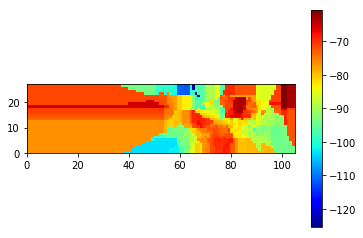

In [204]:
#df_total = pd.read_csv('./zone_result/zone_predict_total.csv')  
zone_predict_total_pd = df_result_algorithm
#print(df_total)
df_total_sort = zone_predict_total_pd.sort_values(by=['y','x'])
#print (df_total_sort)
rsrp_map_frompd = df_total_sort.values
print (rsrp_map_frompd)
np.savetxt('./result_rsrp/rsrp_map_frompd.csv', rsrp_map_frompd, delimiter=',', fmt='%f')

for i in range(len(rsrp_map_frompd)):
    if rsrp_map_frompd[i,3]>=-60:
        rsrp_map_frompd[i,3] = -60
    if rsrp_map_frompd[i,3]<=-130:
        rsrp_map_frompd[i,3] = -130

print (rsrp_map_frompd)
print (len(rsrp_map_frompd))
rsrp_map_pd = (rsrp_map_frompd[:,3]).reshape(27, 105)
img = plt.imread("./pic/51_5F-3.png")
plt.imshow(img, zorder=0, extent=[0, map_size[0], 0, map_size[1]])
heatmap_rsrp = plt.pcolor(rsrp_map_pd,cmap='jet',alpha=1)
plt.savefig('./result_rsrp/rsrp_map.png')
plt.colorbar()


Merge to 51-5F map
===

In [97]:
#bk = Image.open('5f_map.png')
bk = Image.open('./pic/823.PNG')
print (bk.size)
heatmap_rsrp = Image.open('./result_rsrp/rsrp_map.png')
print (heatmap_rsrp.size)
#heatmap_rsrp = heatmap_rsrp.resize((501, 130))
bk = bk.resize((432, 288))
heatmap_rsrp = heatmap_rsrp.resize((432, 288))
#bk = bk.resize((640, 480))
blended = Image.blend(heatmap_rsrp, bk, alpha=0.1)
blended.save('./result_rsrp/zone_rsrp.png')

(623, 411)
(640, 480)


In [ ]:
###choice K    
'''    for K in range(25):
        K_value = K+1
        model = KNeighborsRegressor(n_neighbors = K_value, weights='uniform', algorithm='auto')
        model.fit(X_train, y_train) 
        y_pred = model.predict(X_test)
        accuracy = model.score(X_test, y_test)
        print ("k==",K,"Accuracy is == ", accuracy)
'''
###choice K 

In [132]:
start = time.time()
end = time.time()
elapsed = end - start
print ("Time taken: ", elapsed, "seconds.")

Time taken:  2.0503997802734375e-05 seconds.


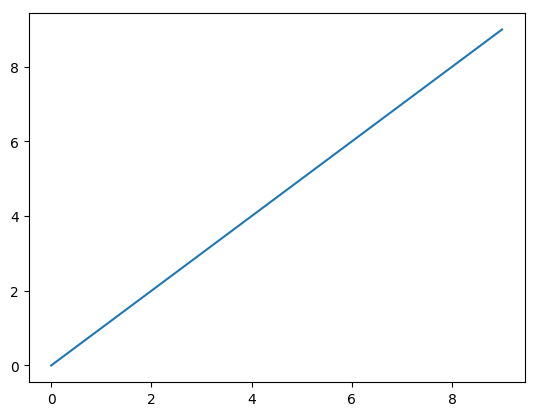

In [83]:

#plt.rcParams.update(plt.rcParamsDefault)
#inline_rc = dict(plt.rcParams)

#plt.plot(range(10))


In [104]:
#bk = Image.open('5f_map.png')
bk = Image.open('./pic/823.PNG')
print (bk.size)
heatmap_rsrp = Image.open('./pic/1.png')
print (heatmap_rsrp.size)
#heatmap_rsrp = heatmap_rsrp.resize((501, 130))
#bk = bk.resize((432, 288))
heatmap_rsrp = heatmap_rsrp.resize((623, 411))
#bk = bk.resize((640, 480))
blended = Image.blend(heatmap_rsrp, bk, alpha=0.1)
blended.save('raw.png')

(623, 411)
(614, 265)


Back code
===

In [ ]:
#title = "Learning Curves (KNN)"
    #plot_learning_curve(model, title, X, y, ylim=(0.1, 1.01))
    #plt.show()
    #train_scores, valid_scores = validation_curve(Ridge(), X_train, y_train, "alpha",
    #                                              np.logspace(-7, 3, 3))
    #print("train_scores==",train_scores)
    #print("valid_scores==",valid_scores)
    #train_scores_mean = np.mean(train_scores, axis=1)
    #valid_scores_mean = np.mean(valid_scores, axis=1)
    #print("train_scores_mean==",train_scores_mean)
    #print("valid_scores_mean==",valid_scores_mean)
    #train_sizes, train_scores, valid_scores = learning_curve(model, X, y,train_sizes=np.linspace(.1, 1.0, 5), cv=5)
    #print("train_scores==",train_scores)
    #print("valid_scores==",valid_scores)
    #plot_learning_curve(model, title, X, y, ylim=(0.1, 1.01),cv=cv)
    #(a,b)=X.shape
    #print(a)
    #print(b)
    #plot_learning_curve(model, title, X, y)
    #plt.show()
    #scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    #print(scores)
    #print(scores.mean())
    '''
    if i==4:
        print("4")
        model = KNeighborsRegressor(n_neighbors=3,weights='distance')
    #model = MLPRegressor(solver='lbfgs', alpha=1e-5,
    #                     hidden_layer_sizes=(30,), random_state=1) 
    #model = KNeighborsRegressor(n_neighbors=3)
        model.fit(X_train, y_train)
    elif i==3:
        print("3")
        model = MLPRegressor(solver='lbfgs', alpha=1e-5,
                             hidden_layer_sizes=(30,), random_state=1) 
        model.fit(X_train, y_train)
    else:
        model = KNeighborsRegressor(n_neighbors=3,weights='distance')
        model.fit(X_train, y_train)
    '''

In [219]:
from sklearn.decomposition import DictionaryLearning
X = train_part_test[:,0:3]
y = train_part_test[:,3]
#print(X)
#print(y)
dct=DictionaryLearning(n_components=5)
dct.fit(X)
X_sparse = dct.transform(X)
print('components is:\n',dct.components_)
#print('after transform:\n',dct.transform(X))
print(type(X_sparse))
print(X_sparse)

components is:
 [[-0.86653434 -0.16985973 -0.46932494]
 [ 0.74830313  0.34251501  0.56808969]
 [-0.9089061  -0.20697463 -0.36200996]
 [-0.80365187 -0.02079332 -0.59473634]
 [ 0.9098468   0.03379493  0.41356585]]
<class 'numpy.ndarray'>
[[ -78.39979061    0.            0.            0.            0.        ]
 [ -94.22214839    0.            0.            0.            0.        ]
 [ -93.7125692     0.            0.            0.            0.        ]
 [ -79.79313983    0.            0.            0.            0.        ]
 [ -95.08868274    0.            0.            0.            0.        ]
 [ -94.56186785    0.            0.            0.            0.        ]
 [ -90.24643182    0.            0.            0.            0.        ]
 [   0.            0.         -111.63838346    0.            0.        ]
 [ -94.57910354    0.            0.            0.            0.        ]
 [ -76.66672192    0.            0.            0.            0.        ]
 [ -91.97950051    0.            0

In [220]:
#print(train_part_test)
train_part_test_del = np.delete(train_part_test, 0, axis=1)
train_part_test_del = np.delete(train_part_test_del, 0, axis=1)
#print(train_part_test_del)
X_sparse_total = np.concatenate((X_sparse,train_part_test_del), axis=1)
#print(X_sparse_total)
np.savetxt("./zone_result/X_sparse_total.csv",X_sparse_total, delimiter=',', fmt='%f')